# **Bioinformatics with Jupyter Notebooks for WormBase:**
## **Analyses 7 - Enrichment Analyses**
Welcome to the seventh jupyter notebook in the WormBase tutorial series. Over this series of tutorials, we will write code in Python that allows us to retrieve and perform simple analyses with data available on the WormBase sites.

This tutorial will deal with performing 3 kinds of enrichment analyses - tissue, gene ontology, and phenotype for the given gene list input.
Let's get started!

For this tutorial we use the WormBase Tissue Enrichment Analysis (TEA) pip package which we need to install and then import. We also need to import other relevant python packages.

In [1]:
!pip install tissue_enrichment_analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tissue_enrichment_analysis as tea
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

Read a csv file with gene names into a dataframe for performing the analyses further.

The csv file needs to have one gene in each line with the first line being a header.

In [3]:
genes = pd.read_csv('data/tea.csv')

For analysing the enrichment, we need to use the dictionaries which are maintained by WormBase regularly. There are 3 dictionaries, each for the three types of enrichment analyses.

In [4]:
#Tissue Enrichment
Tissue_Enrichment = tea.fetch_dictionary('tissue')

#Phenotype Enrichment
Phenotype_Enrichment = tea.fetch_dictionary('phenotype')

#Gene Ontology Enrichment
GO_Enrichment = tea.fetch_dictionary('go')

Now we analyse the gene list against the WormBase TEA dictionaries.

In [5]:
#Create a python dictionary to store the TEA dictionaries.
dictionaries = {'Tissue_Enrichment': Tissue_Enrichment, 'Phenotype_Enrichment': Phenotype_Enrichment, 'GO_Enrichment': GO_Enrichment}

In [6]:
#Test the list of genes and store the results.
#Set the alpha value to extact only the statistically significant results.
cutoff = 0.01

enrichments = {}
for analysis, dictionary in dictionaries.items():
    enrichments[analysis] = tea.enrichment_analysis(genes.gene_name, dictionary, show=False, alpha=cutoff)

We have performed the enrichment analysis! Now we can obtain the results in the form of dataframes!

In [7]:
for enrichment in enrichments:
  print('This is the ', enrichment, ' result dataframe, it has', str(len(enrichments[enrichment])), ' entries')
  display(enrichments[enrichment])

This is the  Tissue_Enrichment  result dataframe, it has 13  entries


,Term,Expected,Observed,Enrichment Fold Change,P value,Q value
32,CEM WBbt:0005246,3.860741,118,30.564077,5.763234e-141,1.728970e-138
83,hook sensillum WBbt:0006930,3.928080,118,30.040121,6.704378e-140,1.005657e-137
28,ray WBbt:0006941,4.893265,118,24.114776,9.387388e-127,9.387388e-125
55,inner labial sensillum WBbt:0005116,5.229958,118,22.562323,6.708829e-123,5.031621e-121
91,male WBbt:0007850,29.527938,118,3.996215,3.538171e-37,2.122903e-35
48,BAG WBbt:0006825,5.521758,20,3.622035,2.895432e-07,1.447716e-05
72,RIS WBbt:0005045,6.767521,22,3.250821,5.714899e-07,2.449242e-05
21,IL2DR WBbt:0004543,0.549931,5,9.092046,1.831186e-05,6.866946e-04
1,IL2VL WBbt:0004538,0.561154,5,8.910206,2.061133e-05,6.870442e-04
36,IL2VR WBbt:0004537,0.572377,5,8.735496,2.313773e-05,6.870442e-04


This is the  Phenotype_Enrichment  result dataframe, it has 1  entries


,Term,Expected,Observed,Enrichment Fold Change,P value,Q value
52,ciliated neuron morphology variant WBPhenotype...,0.206415,6,29.067634,1.613466e-09,3.130124e-07


This is the  GO_Enrichment  result dataframe, it has 7  entries


,Term,Expected,Observed,Enrichment Fold Change,P value,Q value
25,cilium organization GO:0044782,0.467739,8,17.103568,1.240521e-09,3.907641e-07
29,cell projection GO:0042995,3.393704,15,4.419950,4.629212e-07,7.291009e-05
27,cell projection organization GO:0030030,1.673465,10,5.975625,1.265501e-06,1.328776e-04
64,non-motile cilium assembly GO:1905515,0.213081,4,18.772209,2.380255e-06,1.874451e-04
70,cell body GO:0044297,1.210923,8,6.606528,4.361689e-06,2.747864e-04
36,ciliary basal body GO:0036064,0.202687,3,14.801164,5.124456e-05,2.690339e-03
53,excretion GO:0007588,0.259855,3,11.544908,1.371544e-04,6.171950e-03


It is also possible to visualize these enrichments in the form of plots that show the top n hits based on -log10 q values.

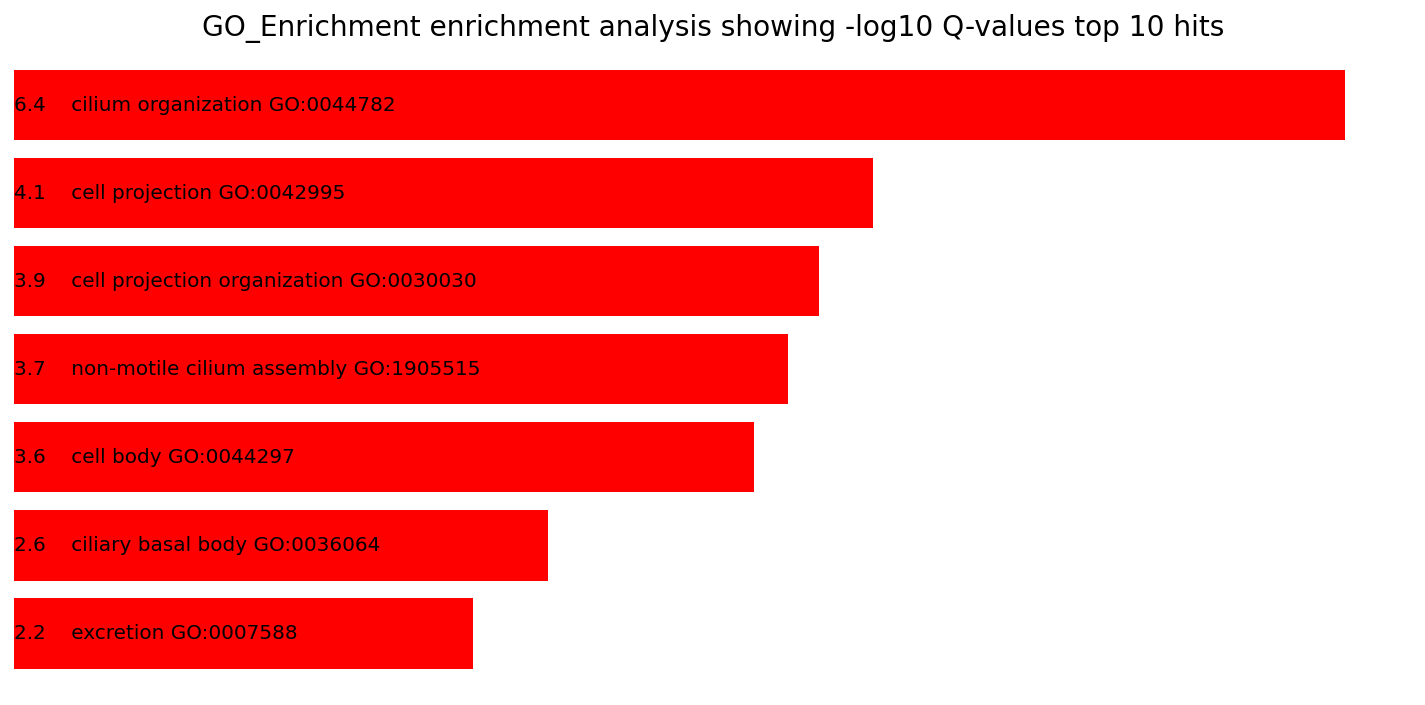

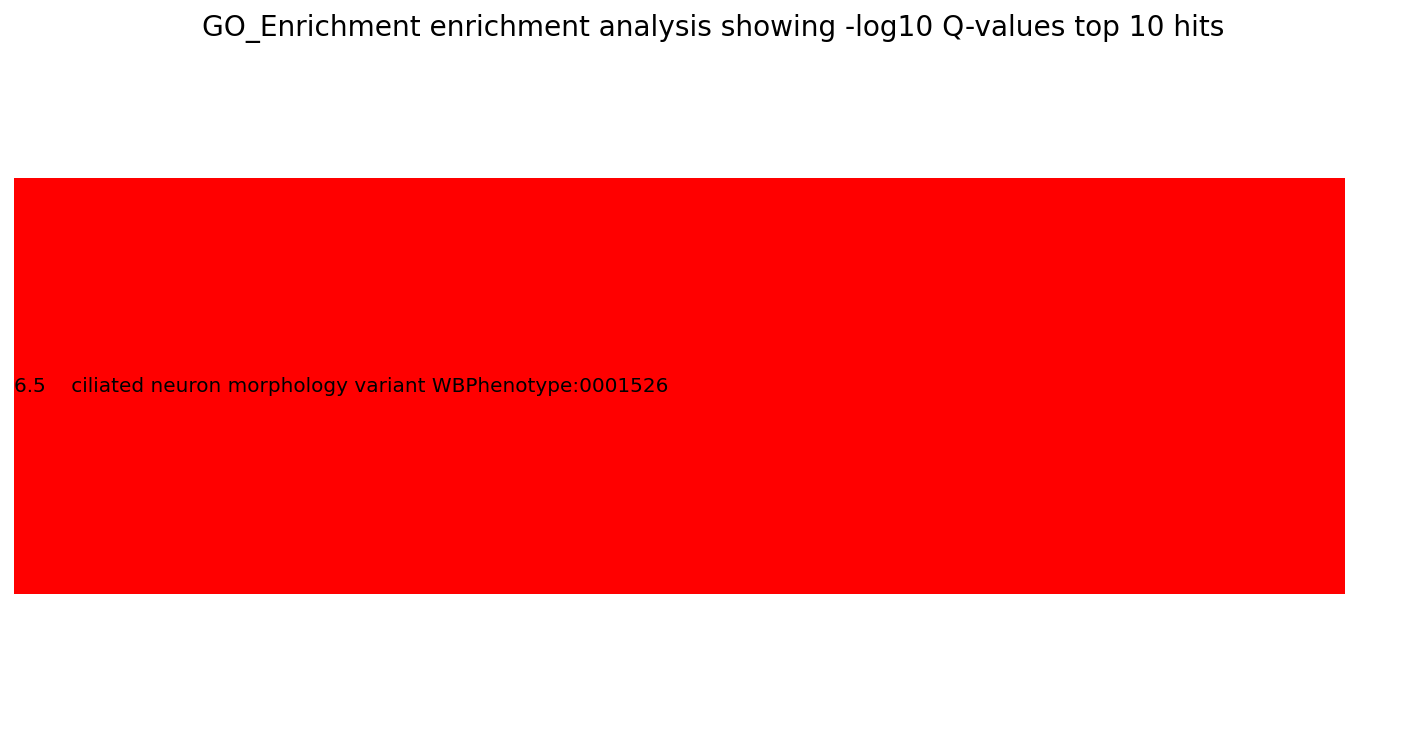

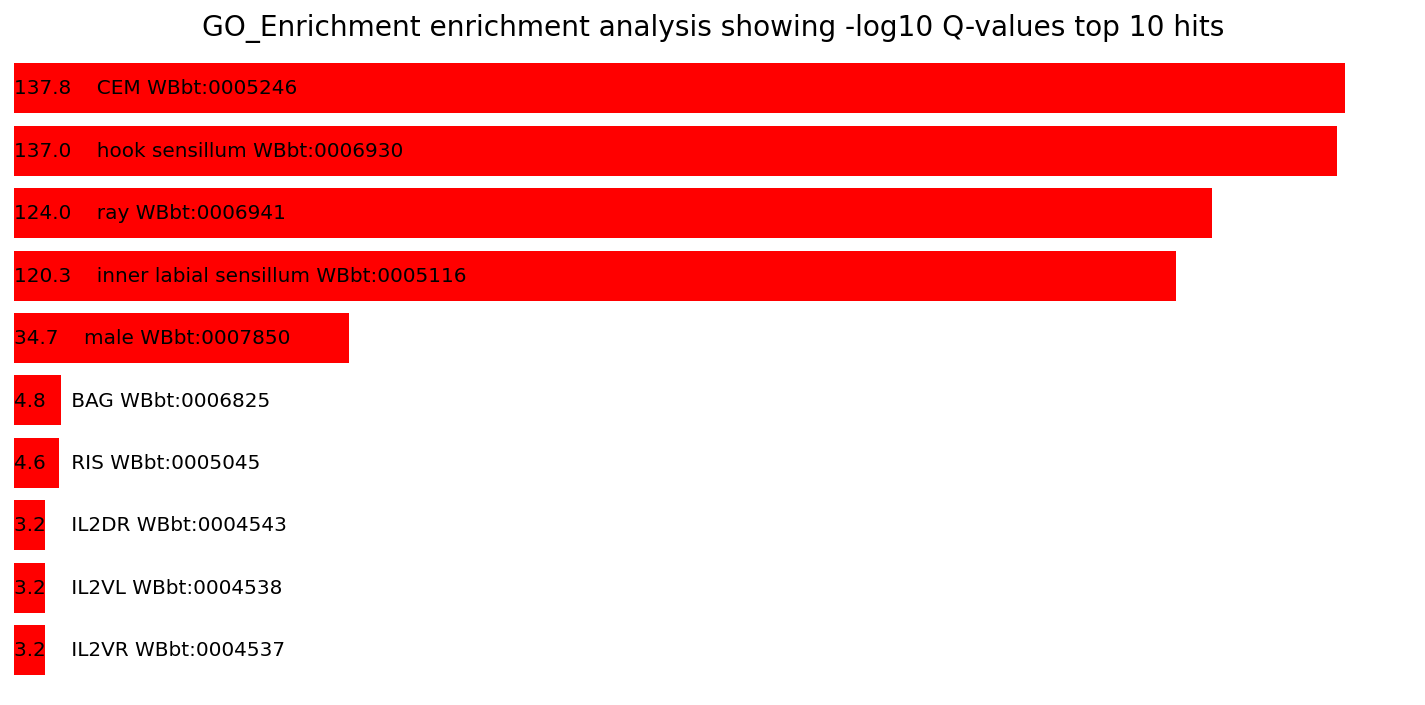

In [8]:
for enrichment in ['GO_Enrichment', 'Phenotype_Enrichment', 'Tissue_Enrichment']:
    data_for_graph = enrichments[enrichment]
    data_for_graph['minus_log10_Qvalue'] = -np.log10(data_for_graph['Q value'])

    #how many top hits do you want?
    n = 10
    
    data_for_graph = data_for_graph.head(n).iloc[::-1]
    data_for_graph.plot(x='Term', y='minus_log10_Qvalue', kind="barh", legend=False, width=0.8, color = 'red', 
                        figsize = (10,5))
    for i, (Term, qval) in enumerate(zip(data_for_graph['Term'], data_for_graph["minus_log10_Qvalue"].round(1).astype(str))):
        plt.text(s = qval + '    ' + Term, x = 0, y = i, color = "k", horizontalalignment = 'left', verticalalignment = "center", size = 10)
        plt.axis("off")
        plt.tight_layout()
        plt.title(f'{analysis} enrichment analysis showing -log10 Q-values top '+str(n)+' hits', fontsize = 14)
plt.show()

This is the end of the seventh tutorial for WormBase data analysis! This tutorial dealt with performing enrichment analyses on WormBase data for a user provided gene list along with generating figures for easy understanding.

Thanks to this tutorial for the help - https://colab.research.google.com/github/Munfred/worm-tutorials/blob/main/tissue_enrichment_analysis.ipynb!

In the next tutorial, we will perform Literature based analyses on WormBase data!